In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
!pip install nltk

In [4]:
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 6.9 MB/s 
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
     |████████████████████████████████| 743 kB 43.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [6]:
import pandas as pd  
fake = pd.read_csv('/content/drive/MyDrive/Bangla dataset/Fake-1K.csv')  
#true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BanglaDataset/LabeledAuthentic-7K.csv',index_col=0)
true = pd.read_csv('/content/drive/MyDrive/Bangla dataset/LabeledAuthentic-7K.csv',index_col=0)

In [7]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.head()

,articleID,domain,date,category,headline,content,label,target
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,fake
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,fake
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,fake
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,fake
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,fake


In [ ]:
true.head()

,domain,date,category,source,relation,headline,content,label,target
articleID,,,,,,,,,
1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,true
2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,true
3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,true
4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,true
5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,true


In [8]:
news = pd.concat([fake, true])
news.head(5)

,articleID,domain,date,category,headline,content,label,target,source,relation
0,1.0,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0.0,fake,NaN,NaN
1,2.0,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0.0,fake,NaN,NaN
2,3.0,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0.0,fake,NaN,NaN
3,4.0,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0.0,fake,NaN,NaN
4,5.0,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0.0,fake,NaN,NaN


target
fake    1299
true    7202
Name: headline, dtype: int64


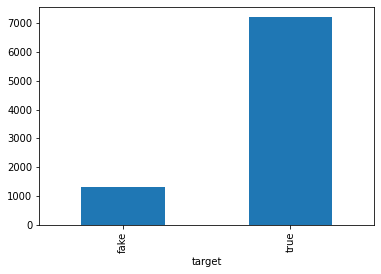

In [ ]:
from matplotlib import pyplot as plt
#print(data.groupby([‘target’])[‘text’].count())
#data.groupby([‘target’])[‘text’].count().plot(kind=”bar”)
#plt.show()
print(news.groupby(['target'])['headline'].count())
news.groupby(['target'])['headline'].count().plot(kind="bar")
plt.show()

target
fake    1299
true    7202
Name: content, dtype: int64


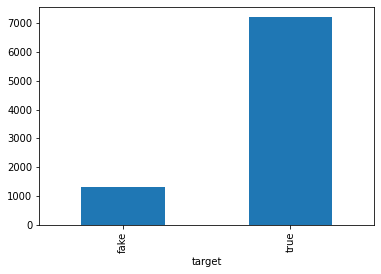

In [ ]:
from matplotlib import pyplot as plt
#print(data.groupby([‘target’])[‘text’].count())
#data.groupby([‘target’])[‘text’].count().plot(kind=”bar”)
#plt.show()
print(news.groupby(['target'])['content'].count())
news.groupby(['target'])['content'].count().plot(kind="bar")
plt.show()

We will shuffle the data to prevent bias:


In [9]:
news = news.sample(frac = 1)

In [10]:
news.head(10)

,articleID,domain,date,category,headline,content,label,target,source,relation
5068,NaN,bd24live.com,2018-09-19 17:54:49,National,"ভালো নেই আফজাল শরীফ, সহায়তা চাইলেন প্রধানমন্ত্রীর",জাতীয় চলচ্চিত্র পুরষ্কার প্রাপ্ত কমেডি অভিনেতা...,1.0,true,জাতীয় চলচ্চিত্র পুরষ্কার প্রাপ্ত কমেডি অভিনেতা,Related
6460,NaN,banglatribune.com,2018-10-05 20:14:55,National,কুষ্টিয়ায় জমির বিরোধের সংঘর্ষে নিহত ১,কুষ্টিয়ার দৌলতপুরে জমি নিয়ে বিরোধের সংঘর্ষে মি...,1.0,true,দৌলতপুর থানার ভারপ্রাপ্ত কর্মকর্তা (ওসি),Related
2676,NaN,dailyjanakantha.com,2018-09-21 17:49:04,Miscellaneous,২১ সেপ্টেম্বর বিশ্ব আলঝেইমারস দিবস।,অনলা্ইন রিপোর্টার ॥ যে রোগে মানুষ সব ভুলে যায় ...,1.0,true,Reporter,Related
5821,NaN,bd-pratidin.com,2018-09-20 16:41:24,National,পুলিশের জন্য ভারত থেকে ২০টি প্রশিক্ষণপ্রাপ্ত ঘ...,বেনাপোল স্থলবন্দর দিয়ে আজ বৃহস্পতিবার সকালে পু...,1.0,true,বেনাপোল পোর্ট থানার ভারপ্রাপ্ত কর্তকর্তা,Related
6305,NaN,bangla.bdnews24.com,2018-09-20 03:25:27,National,ডিআইজি মিজানকে ফের দুদকে তলব,আগামী ৩০ সেপ্টেম্বর সকাল ১০টায় দুদক প্রধান কার...,1.0,true,দুদকের জনসংযোগ কর্মকর্তা,Related
546,550.0,motikontho.wordpress.com,2012-04-29T17:55:36+00:00,Miscellaneous,ডেসটিনিকে সাক্ষাত দিলেন না মালাই লামা | দৈনিক ...,বিশেষ মতিবেদকআলোচিত এম এল এম কম্পানী ডেসটিনির ...,0.0,fake,NaN,NaN
6693,NaN,jagonews24.com,2018-09-20 16:36:31,Crime,কটূক্তি : খালেদার বিরুদ্ধে গ্রেফতারি পরোয়ানার ...,বঙ্গবন্ধু শেখ মুজিবুর রহমান ও ক্ষমতাসীন আওয়াম...,1.0,true,Reporter,Related
461,NaN,bd24live.com,2018-09-20 08:15:10,National,কষ্টসাধ্য জয় নিয়ে যা বললেন রোহিত শর্মা,হংকংয়ের বিপক্ষে এশিয়া কাপের প্রথম ম্যাচে ভারত ...,1.0,true,ভারত অধিনায়ক,Related
8212,NaN,jagonews24.com,2018-09-26 16:59:18,National,ট্রাকসহ ভেঙে পড়ল বেইলি সেতু,টাঙ্গাইল-আরিচা মহাসড়কের নাগরপুর উপজেলার বারাপু...,1.0,true,নাগরপুর থানা পুলিশের ভারপ্রাপ্ত কর্মকর্তা,Related
4646,NaN,channelionline.com,2018-09-21 18:37:06,National,চট্টগ্রামের সঙ্গে ঢাকা ও সিলেটের রেল যোগাযোগ বন্ধ,ব্রাহ্মণবাড়িয়া প্রতিনিধি: ব্রাহ্মণবাড়িয়ার কসবা...,1.0,true,আখাউড়া রেলওয়ে থানা পুলিশের ভারপ্রাপ্ত কর্মকর্তা,Related


Removing unnecessary data

> Indented block



In [ ]:
news.drop(["date"],axis=1,inplace=True)
news.drop(["label"],axis=1,inplace=True)
news.drop(["domain"],axis=1,inplace=True)
news.drop(["relation"],axis=1,inplace=True)
news.drop(["source"],axis=1,inplace=True)
news.drop(["content"],axis=1,inplace=True)



KeyError: ignored

In [ ]:
news.head(20)

,articleID,category,headline,content,target
461,NaN,National,কষ্টসাধ্য জয় নিয়ে যা বললেন রোহিত শর্মা,হংকংয়ের বিপক্ষে এশিয়া কাপের প্রথম ম্যাচে ভারত ...,true
5439,NaN,International,বাংলাদেশকে সহায়তার আশ্বাস নেদারল্যান্ডসের,ডেলটা প্ল্যান ২১০০ বাস্তবায়নে বাংলাদেশকে প্রয়ো...,true
2085,NaN,Politics,বি. চৌধুরীর বাসায় বিএনপির ৩ নেতা ২১ সেপ্টেম্বর...,‘যুক্তফ্রন্ট’ ও ‘জাতীয় ঐক্য প্রক্রিয়ার’ সমাবেশ...,true
5095,NaN,Sports,বোলিংয়ে এসেই শাহজাদকে ফেরালেন সাকিব,ইনিংসের ২০তম ওভারে প্রথমবারের মতো সাকিব আল হাস...,true
4353,NaN,National,বরিশালে জাল দলিলসহ প্রতারক চক্রের ৪ সদস্য আটক,বরিশালে বিপুল পরিমাণ জাল দলিলসহ প্রতারক চক্রের...,true
515,NaN,National,"গাড়ির বেপরোয়া গতি, ৮ মাসে প্রাণ গেল ৩২০২ জনের",গত আট মাসে ৩ হাজার ১৩টি সড়ক দুর্ঘটনায় ৪১১ নারী...,true
1140,NaN,National,সুষ্ঠু নির্বাচন করতে সংসদ ভেঙে দিতে হবে: জাফরু...,‘দেশে অবাধ ও সুষ্ঠু নির্বাচন অনুষ্ঠিত হতে হলে ...,true
1424,NaN,International,আইইবির অস্ট্রেলিয়া চ্যাপ্টারের নতুন কমিটি,ইঞ্জিনিয়ার্স ইনস্টিটিউশন বাংলাদেশের (আইইবি) অস...,true
6196,NaN,National,মানুষের অধিকার হরণে একদিন কাঠগড়ায় দাঁড়াতে হবে:...,'সংবিধান লঙ্ঘন ও মানুষের অধিকার হরণ করার অপরাধ...,true
5045,NaN,International,বঙ্গবন্ধুর ঘাতকদের ফিরিয়ে দেওয়ার দাবিতে জর্জিয়...,রোববার জর্জিয়ার আটলান্টার ডাউন টাউনে সিএনএন ভব...,true


In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits


punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
print(punctuations)
print(digits)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ
০১২৩৪৫৬৭৮৯


Remove digit Stopwords and Punctuations 

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in (punctuations)]
    clean_str = ''.join(all_list)
    return clean_str
news['headline'] = news['headline'].apply(punctuation_removal)
print(news['headline'])

3735    বিপ্লবীদের স্মরণে নির্মিত স্মারক ভাস্কর্যের উদ...
51                                 অনুপ্রেরণায় সালমান শাহ
8241                চাঁদপুরে লঞ্চের ধাক্কায় বাল্কহেড ডুবি
4592    ভারতের চাপে প্রথম রাউন্ড শেষের আগেই সুপার ফোরে...
4615      মায়ের মাদক ব্যবসায় ছেলে  নিয়েছেন রাজনৈতিক আশ্রয়
                              ...                        
1528                           অ্যানিস্টোনকে ঝেড়েছেন জোলি
1005                                 ফল খান ভালো করে ধুয়ে
1175                                       চোট জর্জর ভারত
7497                 চট্টগ্রামে ধর্ষণের অভিযোগে ৬ জন আটক
1231                 ‘বসন্তের কোকিল’ নিয়ে কাদেরের সতর্কতা
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in (punctuations)]
    clean_str = ''.join(all_list)
    return clean_str
news['content'] = news['content'].apply(punctuation_removal)
print(news['content'])

3735    আদিবাসীকৃষক অধিকারখ্যাত সাঁওতাল বিদ্রোহ ও তেভা...
51      সালমান শাহবাংলাদেশের চলচ্চিত্রে এখনো অনুসরণীয় ...
8241    চাঁদপুরে বড় স্টেশন মোলহেডে ত্রিনদী মোহনায় লঞ্চ...
4592    যেখানে ভারতীয় বোর্ডের কথায় আইসিসি ওঠে বসে সেখা...
4615    যশোরের অভয়নগরে মা বেবী বেগমের মাদক ব্যবসার সরব...
                              ...                        
1528    হলিউড তারকা জেনিফার অ্যানিস্টোনকে নাকি ফোনে ঝা...
1005    বাজার থেকে কিনে এনে যেকোনো ফল হুট করেই খেতে শু...
1175    চোট হানা দিয়েছে ভারতের এশিয়া কাপ শিরোপা মিশনে ...
7497    চট্টগ্রামে দুই পোশাকশ্রমিককে ধর্ষণের অভিযোগে...
1231    একই আসনে দল থেকে একাধিক মনোনয়ন প্রত্যাশীকে সতর...
Name: content, Length: 8501, dtype: object


In [ ]:
import string
def stopword_removal(text):
    all_list = [char for char in text if char not in stopwords]
    clean_str = ''.join(all_list)
    return clean_str
news['headline'] = news['headline'].apply(stopword_removal)
print(news['headline'])

3735    বিপ্লবীদে স্মণে নি্মিত স্মাক ভাস্ক্যে উদ্বোধন আজ
51                                  অনুপ্েণায় সালমান শাহ
8241                 চাঁদপুে লঞ্চে ধাক্কায় বাল্কহেড ডুবি
4592        ভাতে চাপে প্থম াউন্ড শেষে আগে সুপা ফোে লানআপ
4615        মায়ে মাদক ব্যবসায় ছেলে  নিয়েছেন াজনৈতিক আশ্য়
                              ...                       
1528                          অ্যানিস্টোনকে ঝেড়েছেন জোলি
1005                                 ফল খান ভালো কে ধুয়ে
1175                                         চোট জ্জ ভাত
7497                   চট্টগ্ামে ধ্ষণে অভিযোগে ৬ জন আটক
1231                    ‘বসন্তে কোকিল’ নিয়ে কাদেে সত্কতা
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def digits_removal(text):
    all_list = [char for char in text if char not in digits]
    clean_str = ''.join(all_list)
    return clean_str
news['headline'] = news['headline'].apply(digits_removal)
print(news['headline'])

3735    বিপ্লবীদে স্মণে নি্মিত স্মাক ভাস্ক্যে উদ্বোধন আজ
51                                  অনুপ্েণায় সালমান শাহ
8241                 চাঁদপুে লঞ্চে ধাক্কায় বাল্কহেড ডুবি
4592        ভাতে চাপে প্থম াউন্ড শেষে আগে সুপা ফোে লানআপ
4615        মায়ে মাদক ব্যবসায় ছেলে  নিয়েছেন াজনৈতিক আশ্য়
                              ...                       
1528                          অ্যানিস্টোনকে ঝেড়েছেন জোলি
1005                                 ফল খান ভালো কে ধুয়ে
1175                                         চোট জ্জ ভাত
7497                    চট্টগ্ামে ধ্ষণে অভিযোগে  জন আটক
1231                    ‘বসন্তে কোকিল’ নিয়ে কাদেে সত্কতা
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def digits_removal(text):
    all_list = [char for char in text if char not in digits]
    clean_str = ''.join(all_list)
    return clean_str
news['content'] = news['content'].apply(digits_removal)
print(news['content'])

3735    আদিবাসীকৃষক অধিকারখ্যাত সাঁওতাল বিদ্রোহ ও তেভা...
51      সালমান শাহবাংলাদেশের চলচ্চিত্রে এখনো অনুসরণীয় ...
8241    চাঁদপুরে বড় স্টেশন মোলহেডে ত্রিনদী মোহনায় লঞ্চ...
4592    যেখানে ভারতীয় বোর্ডের কথায় আইসিসি ওঠে বসে সেখা...
4615    যশোরের অভয়নগরে মা বেবী বেগমের মাদক ব্যবসার সরব...
                              ...                        
1528    হলিউড তারকা জেনিফার অ্যানিস্টোনকে নাকি ফোনে ঝা...
1005    বাজার থেকে কিনে এনে যেকোনো ফল হুট করেই খেতে শু...
1175    চোট হানা দিয়েছে ভারতের এশিয়া কাপ শিরোপা মিশনে ...
7497    চট্টগ্রামে দুই পোশাকশ্রমিককে ধর্ষণের অভিযোগে...
1231    একই আসনে দল থেকে একাধিক মনোনয়ন প্রত্যাশীকে সতর...
Name: content, Length: 8501, dtype: object


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
news["headline"] = news["headline"].apply(lambda x: stem_words(x))
print(news["headline"])

3735    বিপ্লবীদে স্মণে নি্মিত স্মাক ভাস্ক্যে উদ্বোধন আজ
51                                  অনুপ্েণায় সালমান শাহ
8241                 চাঁদপুে লঞ্চে ধাক্কায় বাল্কহেড ডুবি
4592        ভাতে চাপে প্থম াউন্ড শেষে আগে সুপা ফোে লানআপ
4615         মায়ে মাদক ব্যবসায় ছেলে নিয়েছেন াজনৈতিক আশ্য়
                              ...                       
1528                          অ্যানিস্টোনকে ঝেড়েছেন জোলি
1005                                 ফল খান ভালো কে ধুয়ে
1175                                         চোট জ্জ ভাত
7497                     চট্টগ্ামে ধ্ষণে অভিযোগে জন আটক
1231                    ‘বসন্তে কোকিল’ নিয়ে কাদেে সত্কতা
Name: headline, Length: 8501, dtype: object


In [ ]:
import pandas as pd
import nltk
a = news['headline'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.most_common(50) 
#print (word_dist)

[('’', 625),
 ('‘', 543),
 ('না', 451),
 ('নিহত', 325),
 ('থেকে', 259),
 ('কে', 253),
 ('নিয়ে', 239),
 ('দু', 234),
 ('আটক', 212),
 ('হবে', 199),
 ('প্ধানমন্ত্ী', 196),
 ('দৈনিক', 193),
 ('মতিকণ্ঠ', 192),
 ('প', 188),
 ('বাংলাদেশ', 188),
 ('bengal', 181),
 ('beat', 181),
 ('মৃত্যু', 179),
 ('বিনপি', 174),
 ('খালেদা', 168),
 ('হত্যা', 160),
 ('সঙ্গে', 156),
 ('কা', 156),
 ('সেপ্টেম্ব', 149),
 ('উদ্ধা', 147),
 ('টাকা', 141),
 ('ক', 141),
 ('শুু', 138),
 ('বাংলাদেশে', 137),
 ('কতে', 136),
 ('যে', 127),
 ('জন্য', 124),
 ('নে', 119),
 ('আ', 118),
 ('হচ্ছে', 112),
 ('টি', 112),
 ('গ্েফতা', 110),
 ('বন্ধ', 109),
 ('শিশু', 109),
 ('ভাতে', 106),
 ('মামলা', 103),
 ('নতুন', 102),
 ('নেতা', 102),
 ('দিয়ে', 102),
 ('সিনহা', 98),
 ('বিুদ্ধে', 98),
 ('অভিযোগ', 98),
 ('বা', 97),
 ('সড়ক', 96),
 ('ডিজিটাল', 95)]

In [ ]:
import pandas as pd
import nltk
a = news['content'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.most_common(50) 
#print (word_dist)

[('ও', 23671),
 ('করে', 19660),
 ('না', 15014),
 ('থেকে', 14107),
 ('এ', 13908),
 ('এই', 12328),
 ('করা', 11952),
 ('বলেন', 11838),
 ('’', 11825),
 ('তিনি', 11267),
 ('হয়', 10594),
 ('‘', 10241),
 ('হয়েছে', 9794),
 ('হবে', 9193),
 ('তার', 9123),
 ('এবং', 8365),
 ('জন্য', 7962),
 ('নিয়ে', 7771),
 ('এক', 7270),
 ('করতে', 7261),
 ('করেন', 7158),
 ('একটি', 7044),
 ('বলে', 6207),
 ('সঙ্গে', 5795),
 ('তাদের', 5792),
 ('হয়ে', 5711),
 ('আর', 5656),
 ('পর', 5373),
 ('কথা', 5169),
 ('সময়', 4956),
 ('এর', 4817),
 ('দিয়ে', 4750),
 ('যে', 4743),
 ('বাংলাদেশ', 4646),
 ('যায়', 4610),
 ('মধ্যে', 4599),
 ('তারা', 4578),
 ('জানান', 4483),
 ('কিন্তু', 4453),
 ('তবে', 4357),
 ('আমি', 4277),
 ('আমরা', 4139),
 ('কোনো', 4103),
 ('দুই', 4068),
 ('করার', 3923),
 ('হচ্ছে', 3774),
 ('সেপ্টেম্বর', 3767),
 ('পুলিশ', 3731),
 ('করেছে', 3694),
 ('আমার', 3541)]

In [ ]:
#Train-test split
x_train,x_test,y_train,y_test = train_test_split(news['headline'], news.target, test_size=0.2, random_state=1)

In [ ]:
#Train-test split
x_train2,x_test2,y_train2,y_test2 = train_test_split(news['content'], news.target, test_size=0.2, random_state=1)

In [ ]:
x_train.count()

6800

In [ ]:
x_train2.count()

6800

In [ ]:
x_test.count()

1701

In [ ]:
x_test2.count()

1701

In [ ]:
# Vectorizing and applying TF-IDF

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe2 = Pipeline([('vect', CountVectorizer()),            
                 ('model', MultinomialNB())])

# Fitting the model
model = pipe.fit(x_train, y_train)
model2=pipe2.fit(x_train, y_train)
# Accuracy
prediction = model.predict(x_test)
prediction2 = model2.predict(x_test)
print("After using Tfidf and Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("After using Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))

After using Tfidf and Countvectorization the of the model is accuracy: 88.95%
After using Countvectorization the of the model is accuracy: 90.3%


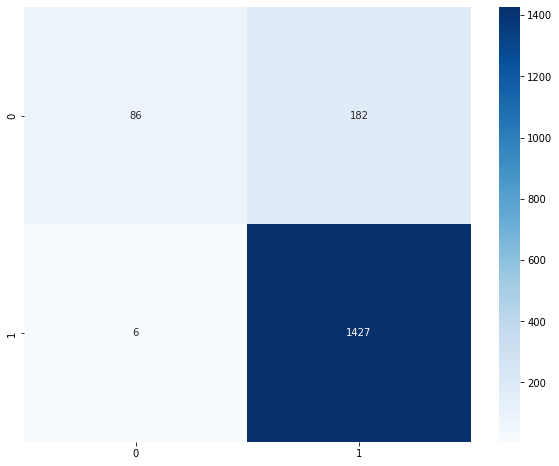

In [ ]:

cf_train_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

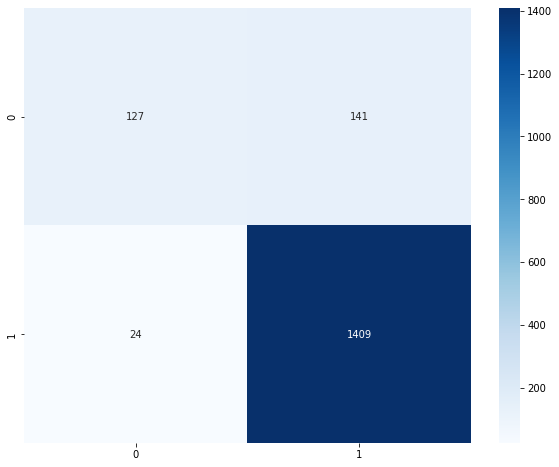

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
cf_train_matrix = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

In [ ]:
cr = classification_report(y_test, prediction)
print(confusion_matrix(y_test, prediction))
print("\n\nClassification Report\n")
print(cr)

[[  86  182]
 [   6 1427]]


Classification Report

              precision    recall  f1-score   support

        fake       0.93      0.32      0.48       268
        true       0.89      1.00      0.94      1433

    accuracy                           0.89      1701
   macro avg       0.91      0.66      0.71      1701
weighted avg       0.89      0.89      0.87      1701



In [ ]:
cr = classification_report(y_test, prediction2)
print(confusion_matrix(y_test, prediction2))
print("\n\nClassification Report\n")
print(cr)

[[ 127  141]
 [  24 1409]]


Classification Report

              precision    recall  f1-score   support

        fake       0.84      0.47      0.61       268
        true       0.91      0.98      0.94      1433

    accuracy                           0.90      1701
   macro avg       0.88      0.73      0.78      1701
weighted avg       0.90      0.90      0.89      1701



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', ExtraTreesClassifier(n_estimators=100))])

pipe2 = Pipeline([('vect', CountVectorizer()),            
                 ('model', ExtraTreesClassifier(n_estimators=100))])

# Fitting the model
model = pipe.fit(x_train, y_train)
model2=pipe2.fit(x_train, y_train)
# Accuracy
prediction = model.predict(x_test)
prediction2 = model2.predict(x_test)
print("After using Tfidf and Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("After using Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))


After using Tfidf and Countvectorization the of the model is accuracy: 91.59%
After using Countvectorization the of the model is accuracy: 90.89%


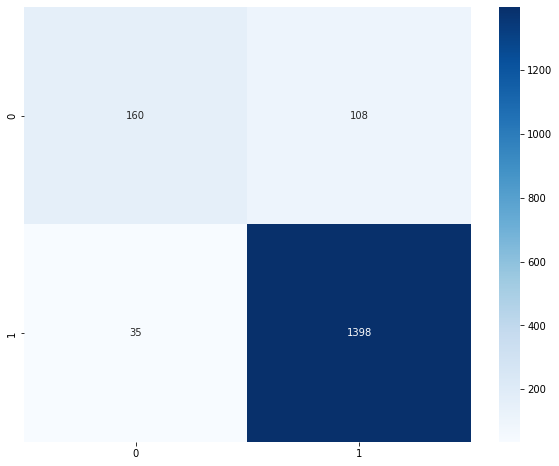

In [ ]:

cf_train_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

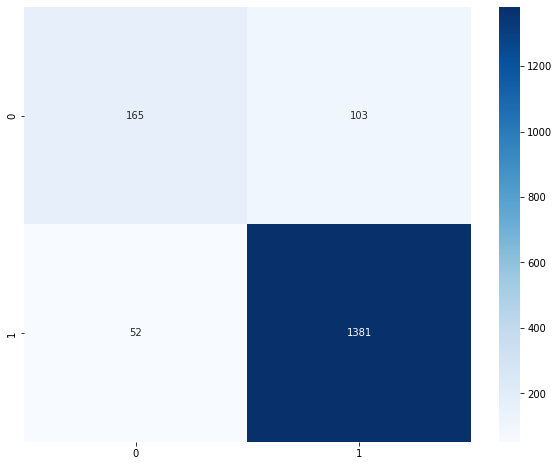

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
cf_train_matrix = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

In [ ]:
cr = classification_report(y_test, prediction)
print(confusion_matrix(y_test, prediction))
print("\n\nClassification Report\n")
print(cr)

[[ 160  108]
 [  35 1398]]


Classification Report

              precision    recall  f1-score   support

        fake       0.82      0.60      0.69       268
        true       0.93      0.98      0.95      1433

    accuracy                           0.92      1701
   macro avg       0.87      0.79      0.82      1701
weighted avg       0.91      0.92      0.91      1701



In [ ]:
cr = classification_report(y_test, prediction2)
print(confusion_matrix(y_test, prediction2))
print("\n\nClassification Report\n")
print(cr)

[[ 165  103]
 [  52 1381]]


Classification Report

              precision    recall  f1-score   support

        fake       0.76      0.62      0.68       268
        true       0.93      0.96      0.95      1433

    accuracy                           0.91      1701
   macro avg       0.85      0.79      0.81      1701
weighted avg       0.90      0.91      0.90      1701



In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
#pac = PassiveAggressiveClassifier(max_iter=50) 


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',PassiveAggressiveClassifier(max_iter=50))])

pipe2 = Pipeline([('vect', CountVectorizer()),            
                 ('model',PassiveAggressiveClassifier(max_iter=50))])

# Fitting the model
model = pipe.fit(x_train, y_train)
model2=pipe2.fit(x_train, y_train)
# Accuracy
prediction = model.predict(x_test)
prediction2 = model2.predict(x_test)
print("After using Tfidf and Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("After using Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))
#print("After using Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))

After using Tfidf and Countvectorization the of the model is accuracy: 89.83%
After using Countvectorization the of the model is accuracy: 89.36%


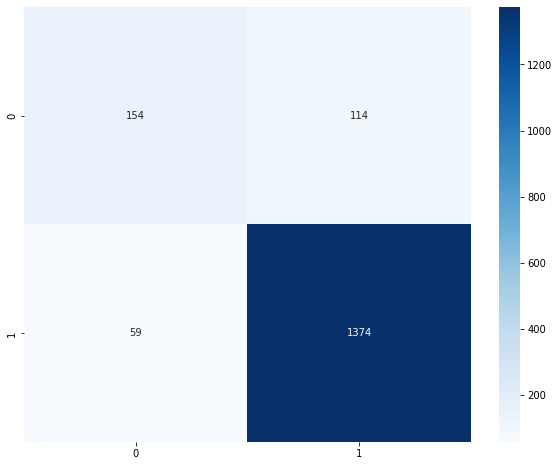

In [ ]:

cf_train_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

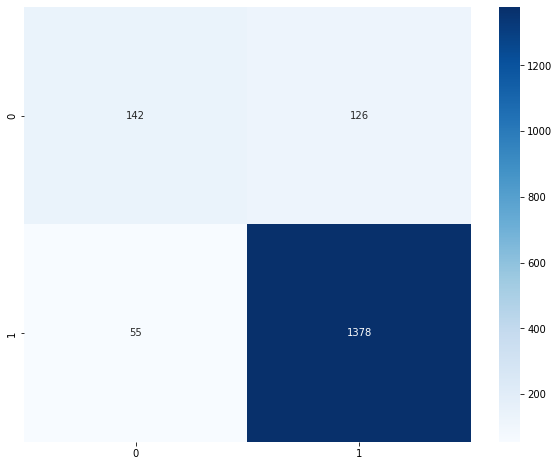

In [ ]:

cf_train_matrix = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

In [ ]:
cr = classification_report(y_test, prediction)
print(confusion_matrix(y_test, prediction))
print("\n\nClassification Report\n")
print(cr)

[[ 154  114]
 [  59 1374]]


Classification Report

              precision    recall  f1-score   support

        fake       0.72      0.57      0.64       268
        true       0.92      0.96      0.94      1433

    accuracy                           0.90      1701
   macro avg       0.82      0.77      0.79      1701
weighted avg       0.89      0.90      0.89      1701



In [ ]:
cr = classification_report(y_test, prediction)
print(confusion_matrix(y_test, prediction2))
print("\n\nClassification Report\n")
print(cr)

[[ 142  126]
 [  55 1378]]


Classification Report

              precision    recall  f1-score   support

        fake       0.72      0.57      0.64       268
        true       0.92      0.96      0.94      1433

    accuracy                           0.90      1701
   macro avg       0.82      0.77      0.79      1701
weighted avg       0.89      0.90      0.89      1701

